In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine


import warnings
warnings.filterwarnings(action="ignore")


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0,1, 0)


# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

1. Apply DBSCAN to the heart disease dataset by trying different values for the eps and min_samples parameters. You'll realize that it's really hard—if not impossible—to get a two-cluster solution using DBSCAN.

In [15]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=1)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

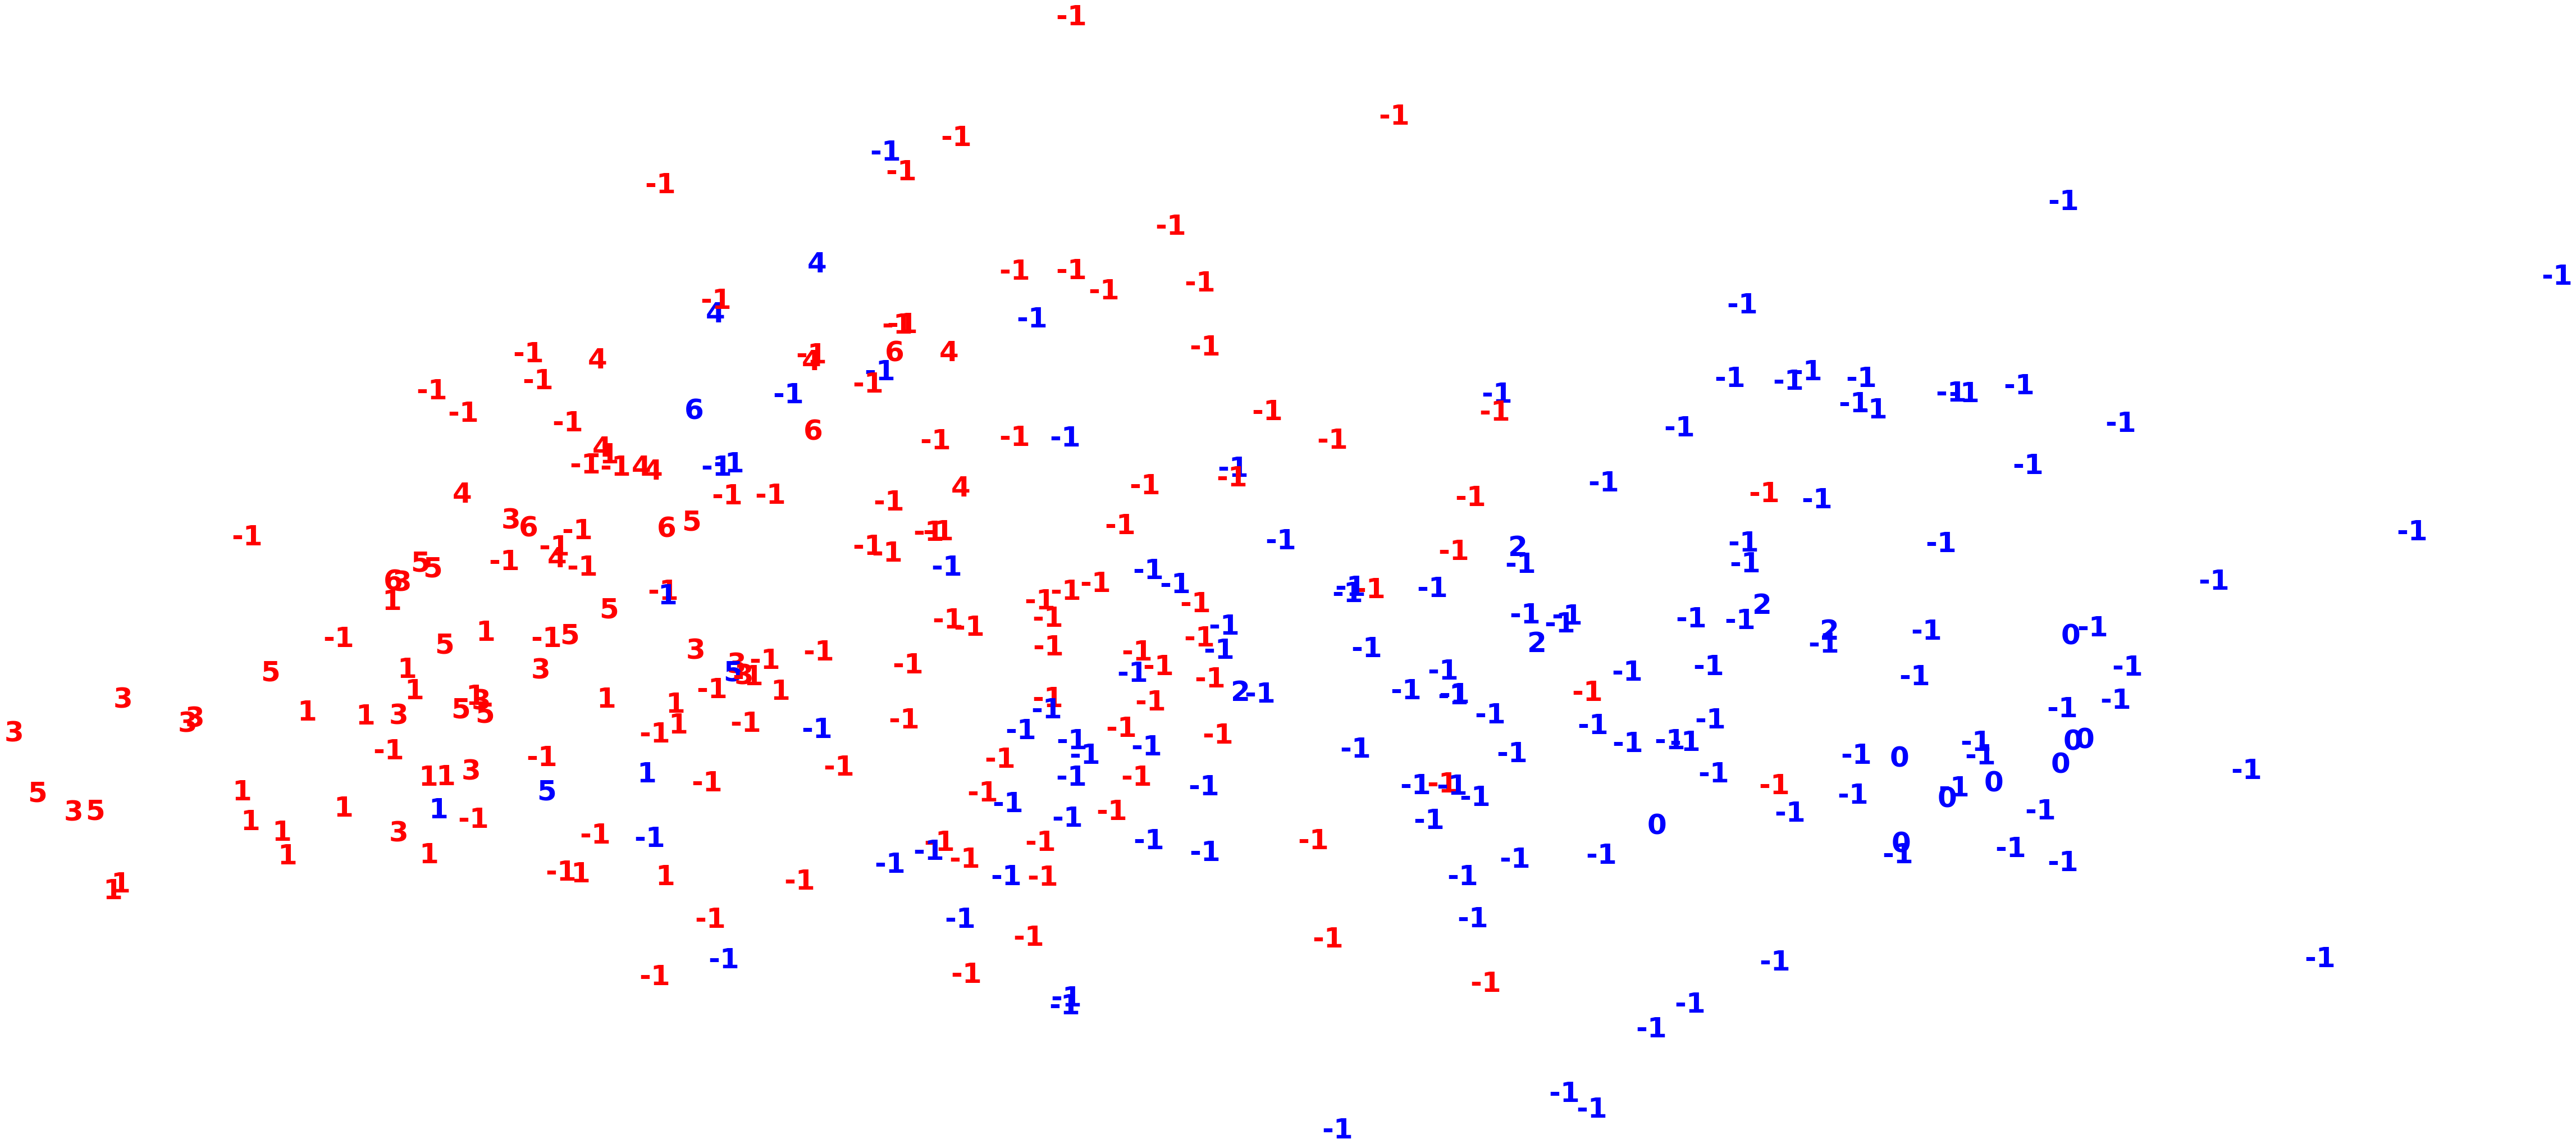

In [10]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of min_samples. When you increase the value of min_samples, how does that affect the number of clusters that DBSCAN identifies?

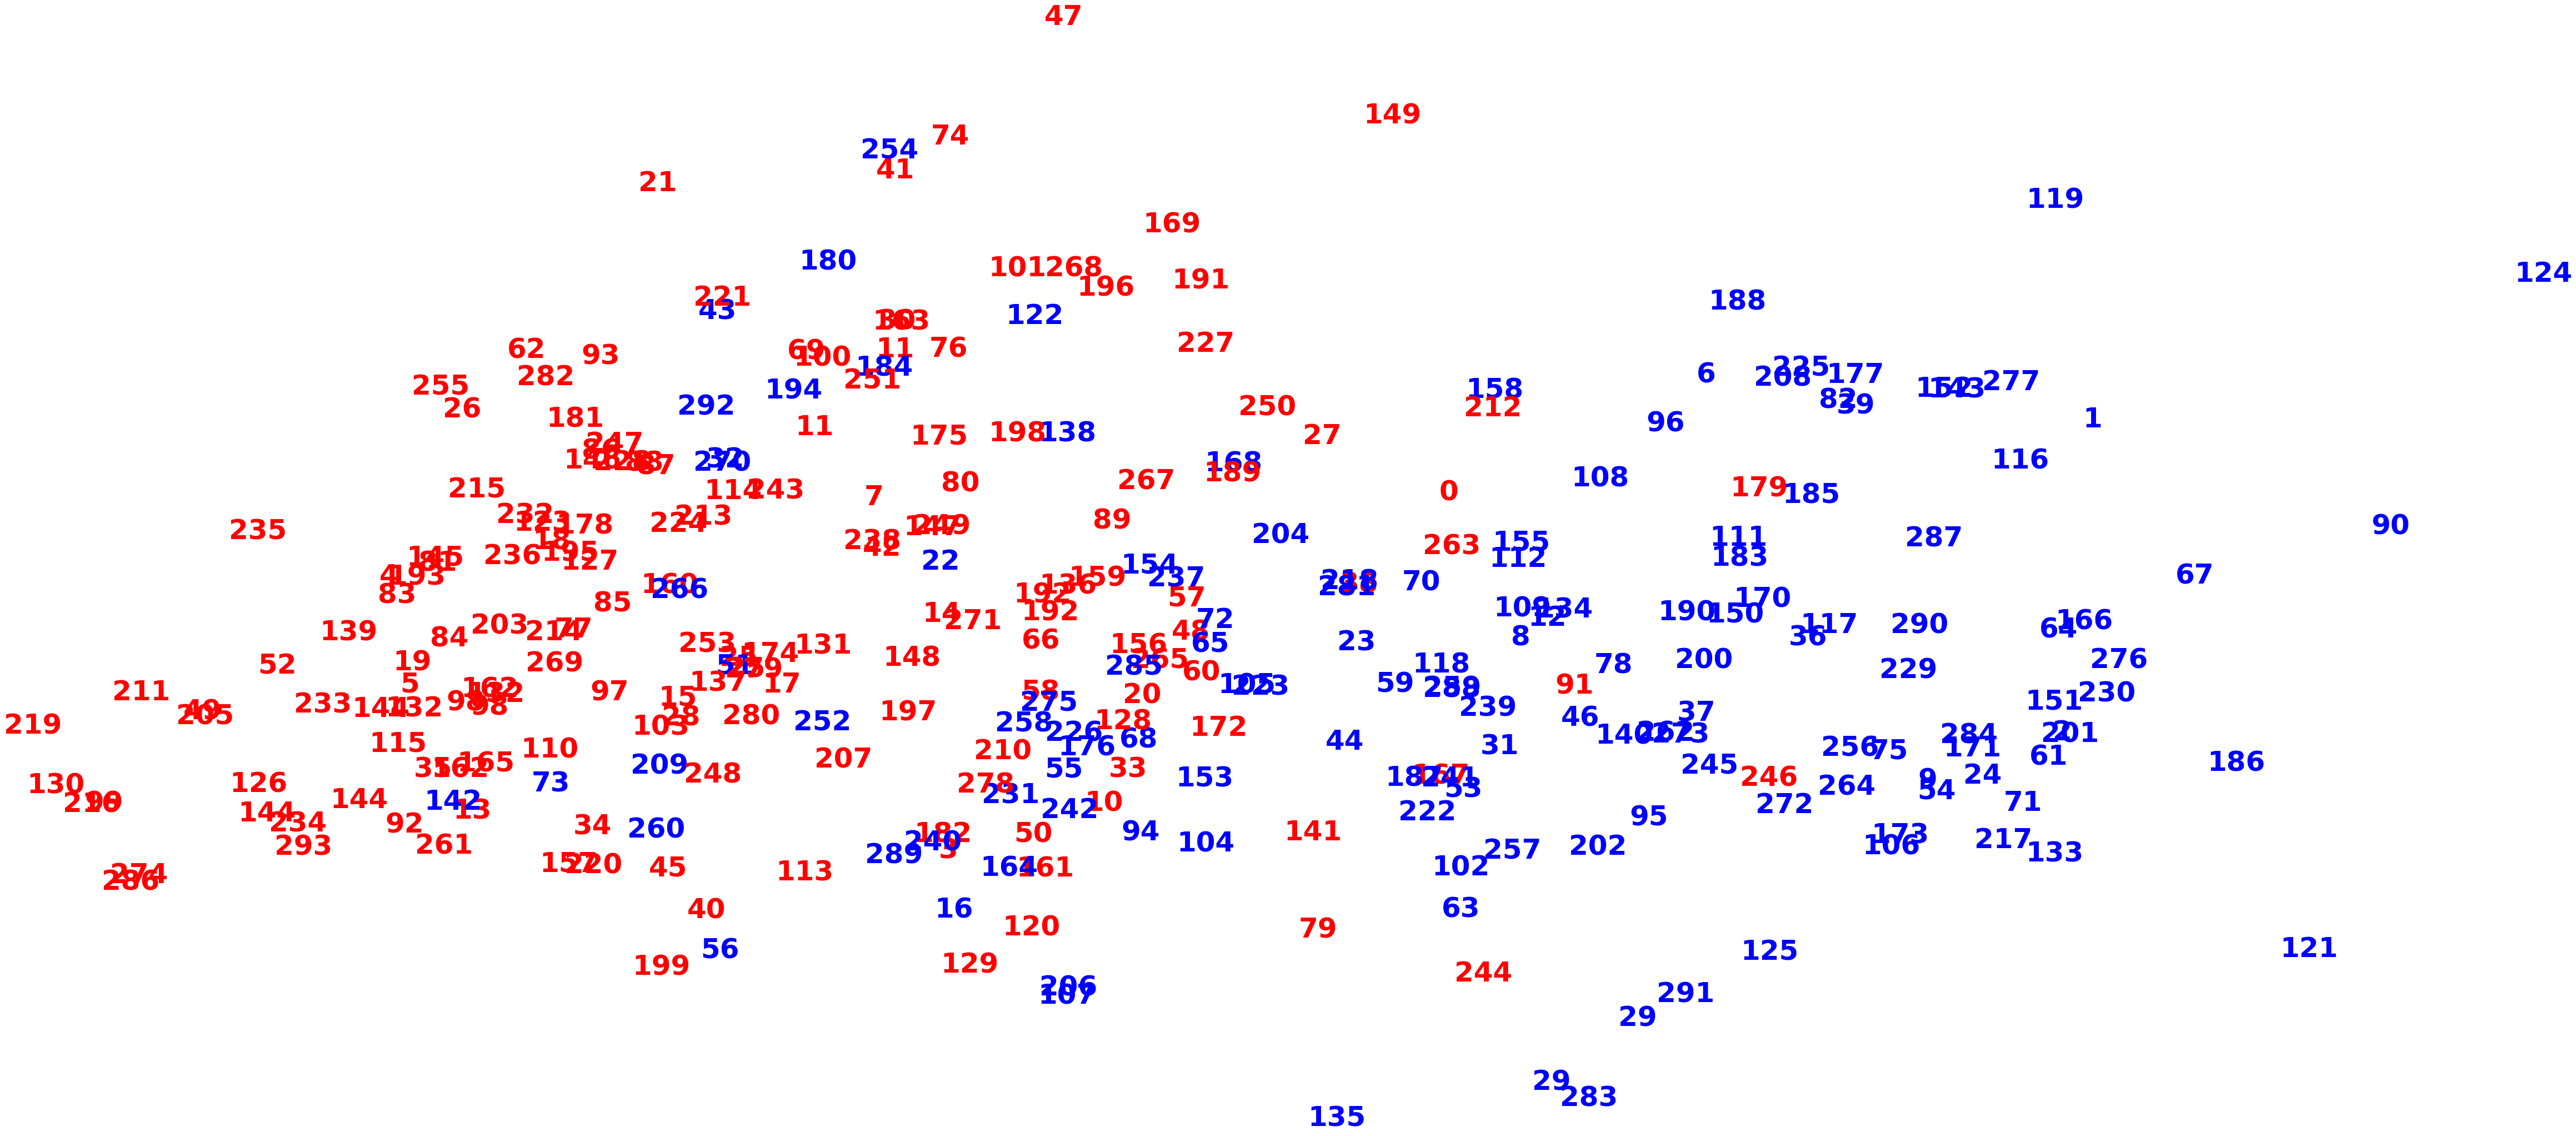

In [16]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric = 'euclidean')

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [20]:
min_samples_list = range(1,20)

for i in range(1,20):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters with min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters with min_samples=1 is: 294
Number of clusters with min_samples=2 is: 9
Number of clusters with min_samples=3 is: 2
Number of clusters with min_samples=4 is: 1
Number of clusters with min_samples=5 is: 1
Number of clusters with min_samples=6 is: 1
Number of clusters with min_samples=7 is: 1
Number of clusters with min_samples=8 is: 1
Number of clusters with min_samples=9 is: 1
Number of clusters with min_samples=10 is: 1
Number of clusters with min_samples=11 is: 1
Number of clusters with min_samples=12 is: 1
Number of clusters with min_samples=13 is: 1
Number of clusters with min_samples=14 is: 1
Number of clusters with min_samples=15 is: 1
Number of clusters with min_samples=16 is: 1
Number of clusters with min_samples=17 is: 1
Number of clusters with min_samples=18 is: 1
Number of clusters with min_samples=19 is: 1


The number of clusters decrease as the min_samples increase, converging at 1 cluster. 

3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of eps. When you increase the value of eps, how does that affect the number of clusters that DBSCAN identifies?

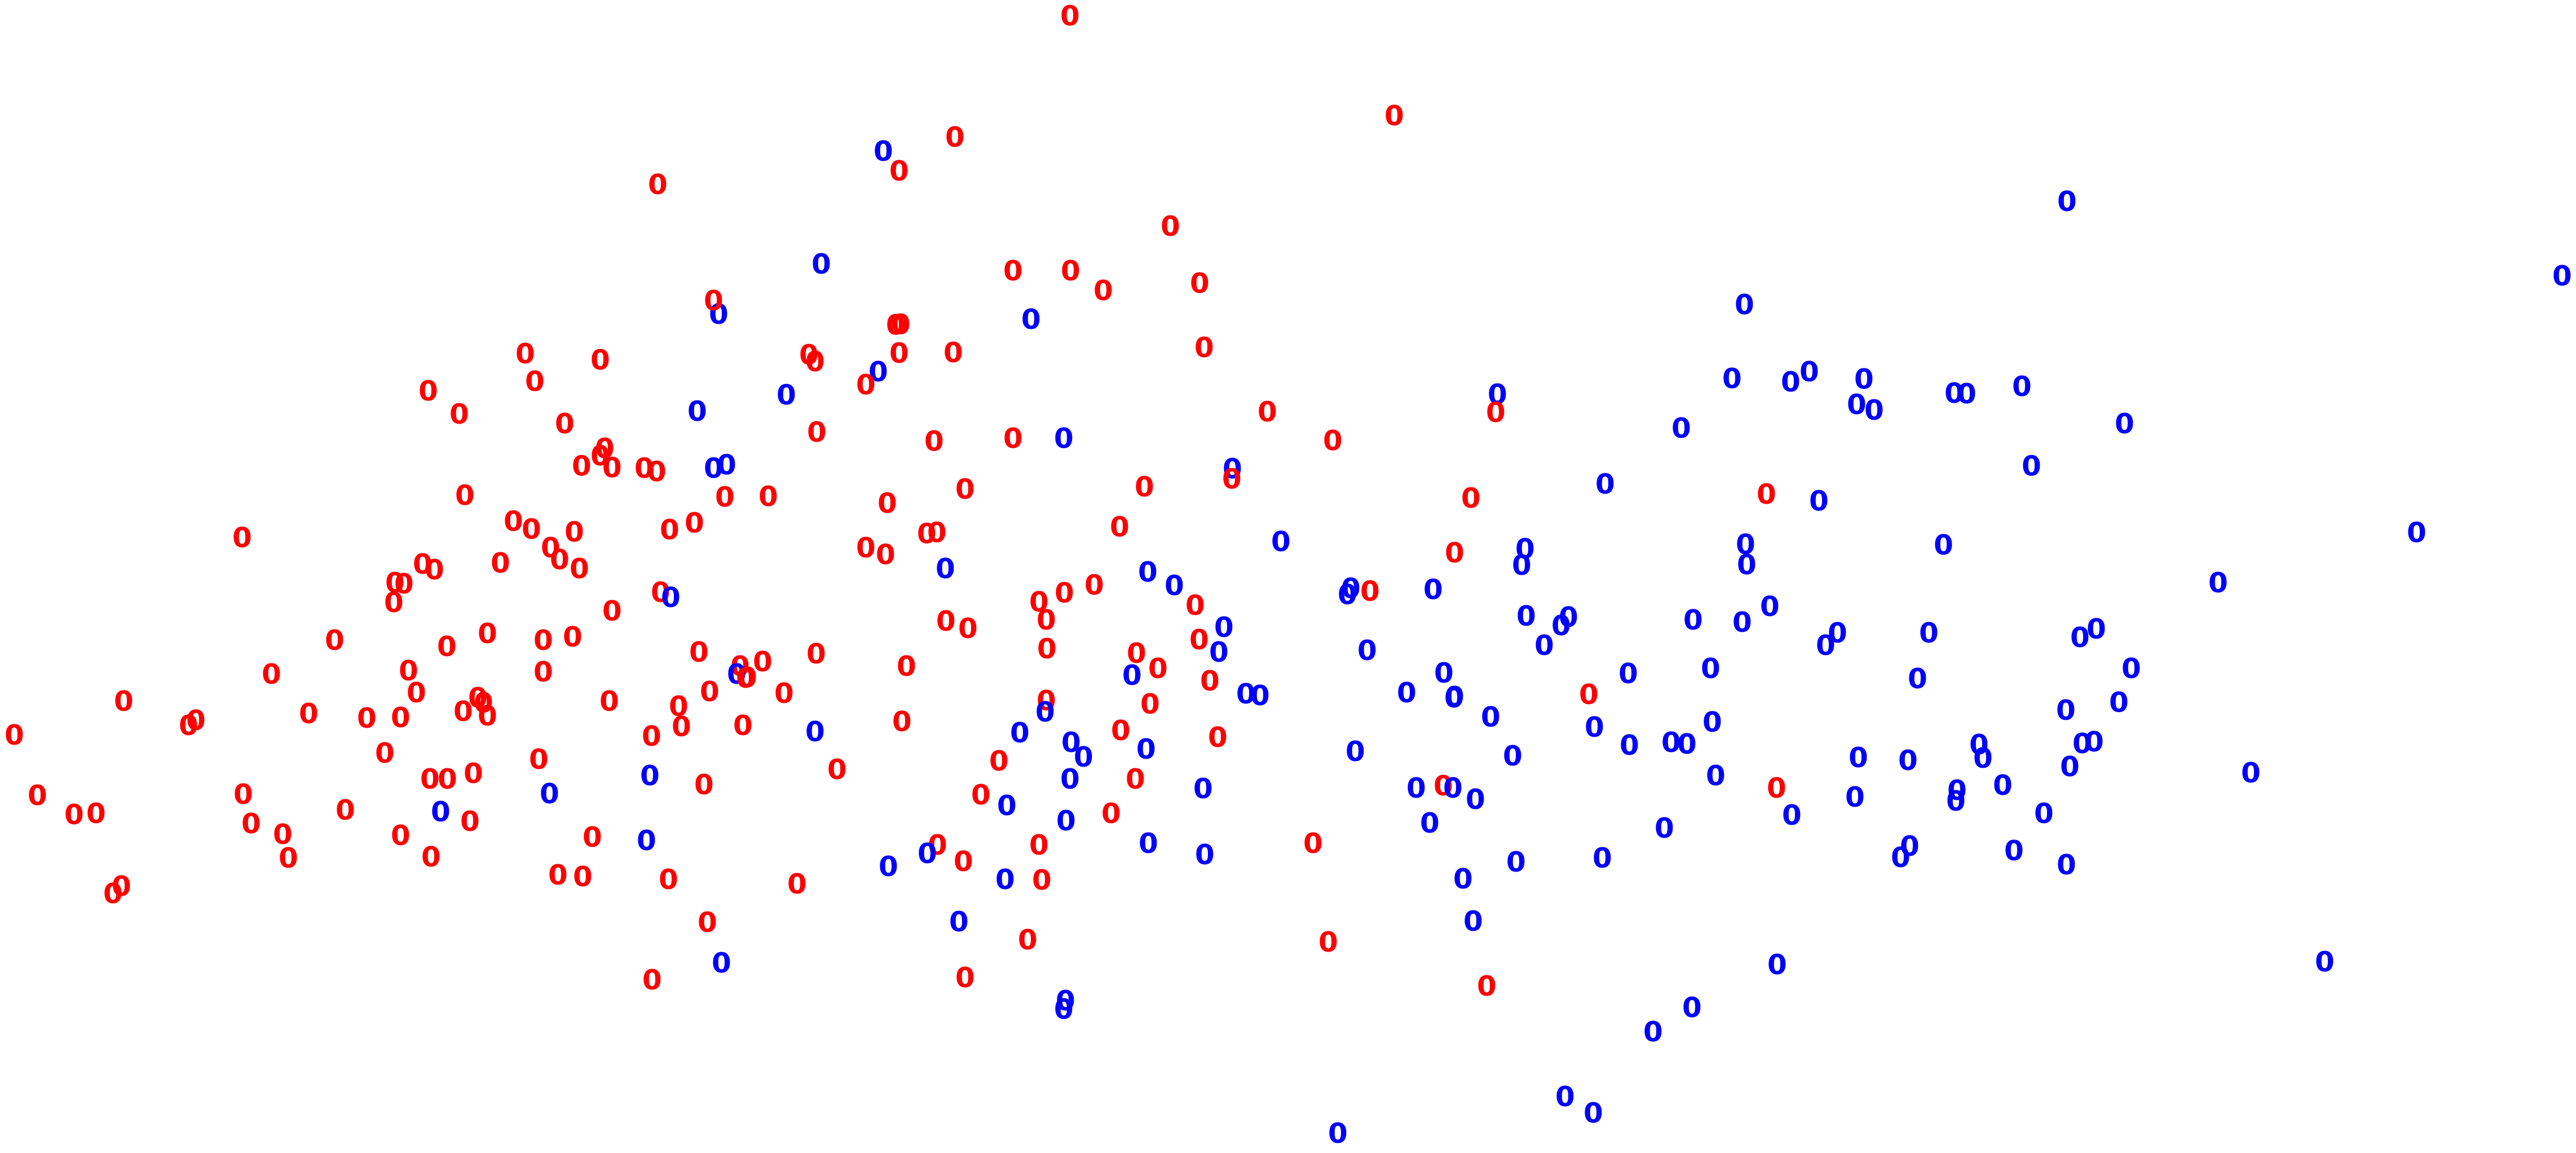

In [22]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=5, min_samples=1, metric = 'euclidean')

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [23]:
eps_list = range(1,20)

for i in range(1,20):
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters with eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters with eps=1 is: 294
Number of clusters with eps=2 is: 178
Number of clusters with eps=3 is: 34
Number of clusters with eps=4 is: 3
Number of clusters with eps=5 is: 1
Number of clusters with eps=6 is: 1
Number of clusters with eps=7 is: 1
Number of clusters with eps=8 is: 1
Number of clusters with eps=9 is: 1
Number of clusters with eps=10 is: 1
Number of clusters with eps=11 is: 1
Number of clusters with eps=12 is: 1
Number of clusters with eps=13 is: 1
Number of clusters with eps=14 is: 1
Number of clusters with eps=15 is: 1
Number of clusters with eps=16 is: 1
Number of clusters with eps=17 is: 1
Number of clusters with eps=18 is: 1
Number of clusters with eps=19 is: 1


Similary, The number of clusters decrease as the value of eps increases, converging at 1 cluster. 